In [2]:
# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

# import necessary modules
import pandas as pd
from datetime import datetime
import numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [3]:
# read in the data
df = pd.read_csv("./../data/supervised_1_1.csv")

In [4]:
df.set_index('date', inplace=True)
print(df.shape)
df.head()

(7115050, 19)


,e5gas,weekday,latitude,longitude,dautobahn,autobahn,aral,esso,jet,shell,total,rotterdam,brent,wti,eurusd,vehicles,state,station,num_days
date,,,,,,,,,,,,,,,,,,,
2014-05-16,1.536647,5,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622837,109.424042,101.258553,1.369886,15211.0,10,0,0
2014-05-17,1.564000,6,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622486,109.699997,101.669998,1.369580,9146.0,10,0,1
2014-05-18,1.569417,0,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622136,109.699997,101.669998,1.369580,9843.0,10,0,2
2014-05-19,1.578167,1,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.621785,109.838928,102.008537,1.370161,13502.0,10,0,3
2014-05-20,1.599000,2,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.620475,109.522926,102.058907,1.368282,12876.0,10,0,4


In [28]:
df['e5gas'].describe()

count    7.115050e+06
mean     1.453640e+00
std      1.044921e-01
min      8.995000e-01
25%      1.364833e+00
50%      1.456917e+00
75%      1.539833e+00
max      2.498042e+00
Name: e5gas, dtype: float64

In [5]:
# try removing the averages so as to not include endogenous variables on the rigth hand side
df.drop(['eurusd', 'vehicles'], axis=1, inplace=True)
print(df.shape)
df.head()

(7115050, 17)


,e5gas,weekday,latitude,longitude,dautobahn,autobahn,aral,esso,jet,shell,total,rotterdam,brent,wti,state,station,num_days
date,,,,,,,,,,,,,,,,,
2014-05-16,1.536647,5,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622837,109.424042,101.258553,10,0,0
2014-05-17,1.564000,6,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622486,109.699997,101.669998,10,0,1
2014-05-18,1.569417,0,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622136,109.699997,101.669998,10,0,2
2014-05-19,1.578167,1,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.621785,109.838928,102.008537,10,0,3
2014-05-20,1.599000,2,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.620475,109.522926,102.058907,10,0,4


In [8]:
loc = dataset[['latitude', 'longitude']]

loc = loc.drop_duplicates()
loc.dropna(inplace=True)

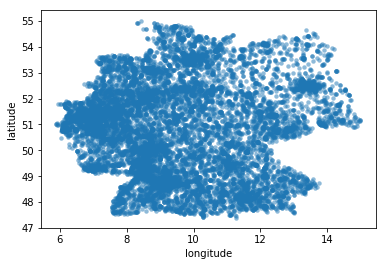

In [9]:
# scatterplot it to get a sense of what it looks like
loc = loc.sort_values(by=['latitude', 'longitude'])
ax = loc.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, linewidth=0)

In [10]:
# loc.to_csv('./../data/used_lat_lon.csv')

In [30]:
df.describe()

,e5gas,weekday,latitude,longitude,dautobahn,autobahn,aral,esso,jet,shell,total,rotterdam,brent,wti,state,station,num_days
count,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06,7.115050e+06
mean,1.453640e+00,3.003478e+00,5.090882e+01,9.598163e+00,6.850198e+03,3.159851e-02,1.677791e-01,7.541521e-02,4.323118e-02,1.307829e-01,2.763396e-02,4.941067e-01,7.062451e+01,6.540877e+01,1.076895e+01,7.394332e+03,2.870000e+02
std,1.044921e-01,1.999997e+00,1.738574e+00,1.998457e+00,7.997500e+03,1.749287e-01,3.736701e-01,2.640602e-01,2.033771e-01,3.371628e-01,1.639217e-01,9.999689e-02,2.264122e+01,2.188225e+01,6.568266e+00,4.266422e+03,1.659880e+02
min,8.995000e-01,0.000000e+00,4.741290e+01,5.901020e+00,1.899418e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.217010e-01,3.928281e+01,3.726793e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.364833e+00,1.000000e+00,4.944450e+01,8.067530e+00,1.422265e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.960821e-01,5.098260e+01,4.729510e+01,3.000000e+00,3.725000e+03,1.430000e+02
50%,1.456917e+00,3.000000e+00,5.102665e+01,9.298795e+00,3.777007e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.060101e-01,6.220455e+01,5.738298e+01,1.300000e+01,7.378500e+03,2.870000e+02
75%,1.539833e+00,5.000000e+00,5.220410e+01,1.102830e+01,9.345474e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.951315e-01,9.213597e+01,8.972000e+01,1.500000e+01,1.111000e+04,4.310000e+02
max,2.498042e+00,6.000000e+00,5.490440e+01,1.498390e+01,6.410973e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.813258e-01,1.146798e+02,1.066800e+02,2.600000e+01,1.469700e+04,5.740000e+02


In [37]:
len(df['station'].unique())

12374

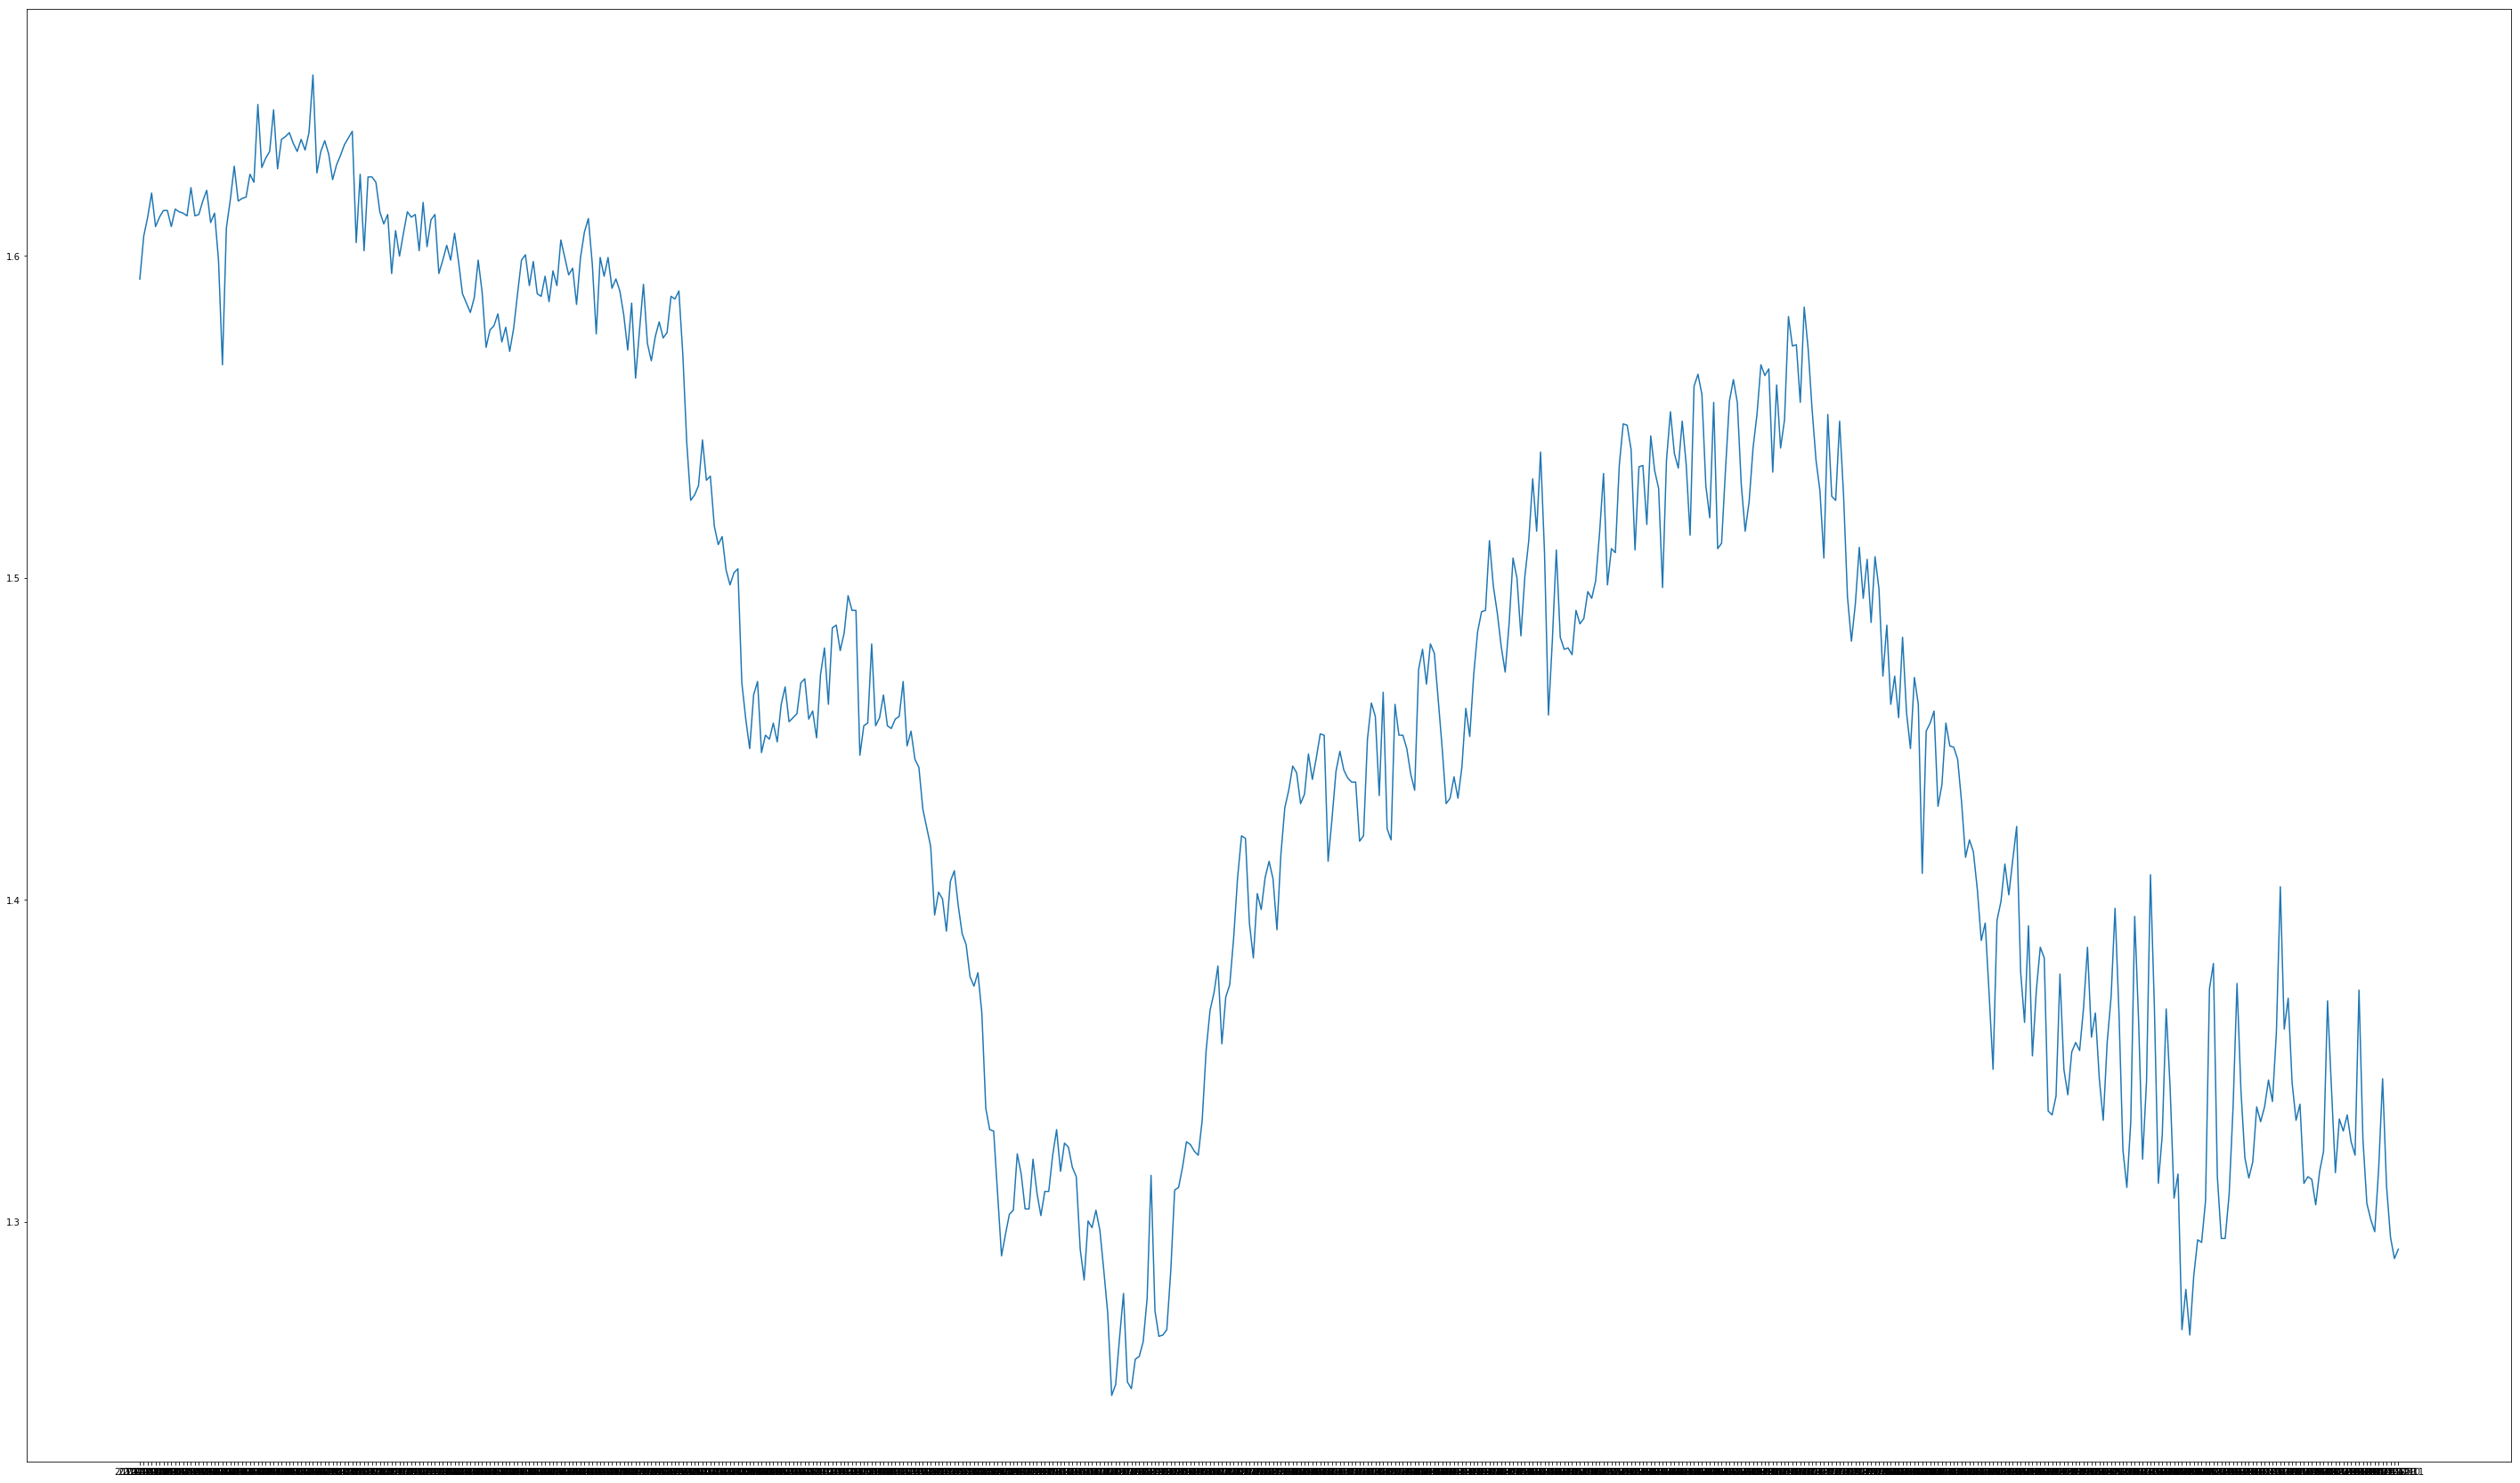

In [14]:
plt.figure(figsize=(50,30))
plt.plot(df[df['station'] == 201]['e5gas'])
plt.show()

In [48]:
t = pd.DataFrame()
t['e5gas'] = df[df['station'] == 201]['e5gas']
t.reset_index(inplace=True)
t['date'] = pd.to_datetime(t['date'])

In [55]:
from bokeh.plotting import figure, output_file, show

output_file("datetime.html")

# create a new plot with a datetime axis type
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")

p.line(t['date'], t['e5gas'], color='navy', alpha=0.5)
p.yaxis.axis_label = 'Gas Price (€)'

show(p)

In [54]:
r = figure(plot_width=800, plot_height=250)
r.circle(df[df['station'] == 201]['e5gas'], df[df['station'] == 201]['rotterdam'], color='navy', alpha=0.5)
r.xaxis.axis_label = 'Station Gas Price (€)'
r.yaxis.axis_label = 'Rotterdam Gas Price ($)'
show(r)